### Importación de librerías

In [11]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
import warnings
from sklearn.metrics import classification_report

### Diccionario de categorías

In [12]:
MAP_FLOWERS = {
    0: 'daisy', 1: 'dandelion', 2: 'rose',
    3: 'sunflower', 4: 'tulip'
}

IMG_SIZE = 64

### Carga de datos

In [13]:
def load_train_set(dirname, map_pieces, verbose=True):
	X = []
	y = []
	for label, character in map_pieces.items():
		files = os.listdir(os.path.join(dirname, character))
		images = [file for file in files if file.endswith("jpg")]
		if verbose:
			print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
		for image_name in images:
			image = cv2.imread(os.path.join(dirname, character, image_name))
			X.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
			y.append(label)
	return np.array(X), np.array(y)

In [14]:
X, y = load_train_set("dataset-flores/train", MAP_FLOWERS)

Leyendo 501 imágenes encontradas de daisy
Leyendo 646 imágenes encontradas de dandelion
Leyendo 497 imágenes encontradas de rose
Leyendo 495 imágenes encontradas de sunflower
Leyendo 607 imágenes encontradas de tulip


### División de datos de entrenamiento y test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Permutación y normalización de imágenes

In [16]:
perm = np.random.permutation(len(X_train))
X_train, y_train = X_train[perm], y_train[perm]

In [17]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Análisis de los datos a utilizar

In [43]:
def visualize_example(x):
  plt.figure()
  plt.imshow(x)
  plt.colorbar()
  plt.grid(False)
  plt.show()

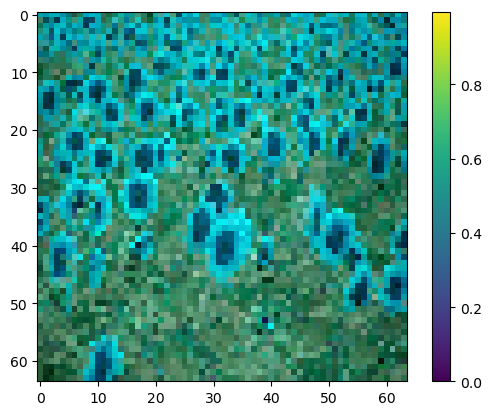

sunflower
(64, 64, 3)


In [10]:
visualize_example(X_train[75]) # Visualiza la imagen normalizada con valores de 0 a 1
print(MAP_FLOWERS[y_train[75]]) # Acceso al diccionario
print(X_train[75].shape[0:3]) # Dimensiones de la imagen tras resize con los 3 canales RGB

### Modelo

In [18]:
num_classes=5
epochs=5
img_rows,img_cols=IMG_SIZE,IMG_SIZE
input_shape=(img_rows,img_cols,3) #(64,64,3)

In [19]:
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [34]:
warnings.filterwarnings("ignore", category=DeprecationWarning, module="tensorflow")

model = keras.Sequential([
  keras.layers.Conv2D(32, kernel_size=(3, 3), data_format="channels_last",input_shape=(64, 64, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Flatten(),
  keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.L1L2(l2=0.02)),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(5, activation='softmax', kernel_regularizer=keras.regularizers.L1L2(l2=0.02))
])

model.compile(
  optimizer='adam',
	loss='categorical_crossentropy',
	metrics=['accuracy']
)

history=model.fit(X_train, y_train, epochs=40, validation_split = 0.10)

Epoch 1/40
62/62 [==============================] - 3s 35ms/step - loss: 5.8161 - accuracy: 0.3416 - val_loss: 1.6858 - val_accuracy: 0.3773
Epoch 2/40
62/62 [==============================] - 2s 33ms/step - loss: 1.4535 - accuracy: 0.4413 - val_loss: 1.2760 - val_accuracy: 0.4909
Epoch 3/40
62/62 [==============================] - 2s 33ms/step - loss: 1.3141 - accuracy: 0.4863 - val_loss: 1.2049 - val_accuracy: 0.5455
Epoch 4/40
62/62 [==============================] - 2s 33ms/step - loss: 1.2706 - accuracy: 0.5172 - val_loss: 1.1398 - val_accuracy: 0.5409
Epoch 5/40
62/62 [==============================] - 2s 33ms/step - loss: 1.2006 - accuracy: 0.5587 - val_loss: 1.2099 - val_accuracy: 0.5227
Epoch 6/40
62/62 [==============================] - 2s 33ms/step - loss: 1.1566 - accuracy: 0.5749 - val_loss: 1.2023 - val_accuracy: 0.5227
Epoch 7/40
62/62 [==============================] - 2s 32ms/step - loss: 1.1261 - accuracy: 0.6012 - val_loss: 1.0724 - val_accuracy: 0.5955
Epoch 8/40
62

### Gráficas de precisión y pérdida

In [22]:
def plot_acc(history, title="Model Accuracy"):
  """Imprime una gráfica mostrando la accuracy por epoch obtenida en un entrenamiento"""
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title(title)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()
  
def plot_loss(history, title="Model Loss"):
  """Imprime una gráfica mostrando la pérdida por epoch obtenida en un entrenamiento"""
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(title)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

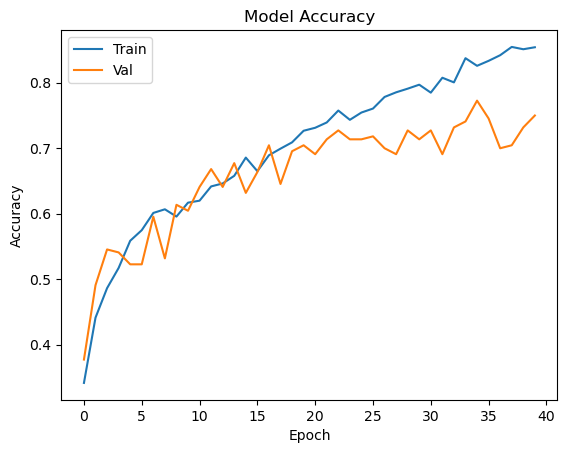

In [38]:
plot_acc(history)

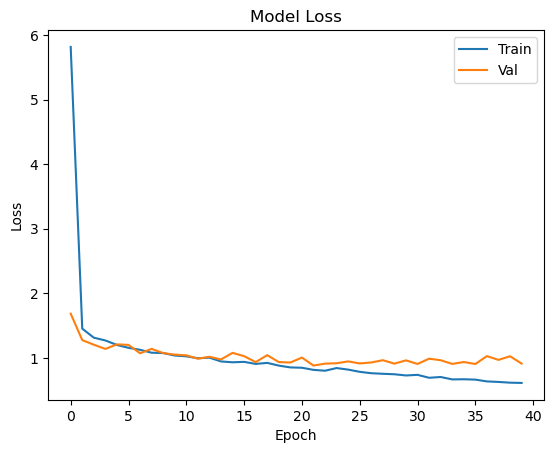

In [39]:
plot_loss(history)

### Evaluación y predicción con los datos de test

In [37]:
model.evaluate(X_test, y_test, batch_size=32, verbose=1)

18/18 [==============================] - 0s 12ms/step - loss: 0.8623 - accuracy: 0.7618


[0.8623468279838562, 0.7618181705474854]

In [40]:
prediccion=model.predict(X_test, batch_size=32, verbose=1)

18/18 [==============================] - 0s 9ms/step


In [41]:
y_test[5]

array([0., 0., 0., 0., 1.], dtype=float32)

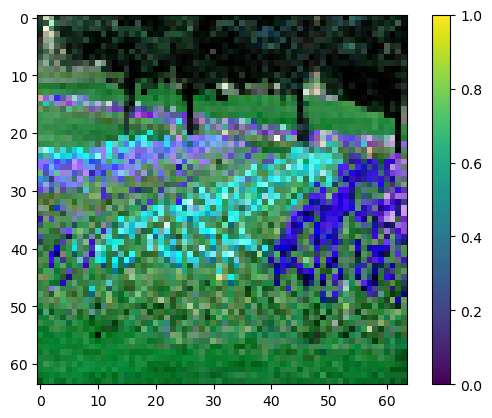

tulip
(64, 64, 3)


In [44]:
visualize_example(X_test[5]) # Visualiza la imagen normalizada con valores de 0 a 1
print(MAP_FLOWERS[np.argmax(y_test[5])]) # Acceso al diccionario
print(X_test[5].shape[0:3]) # Dimensiones de la imagen tras resize con los 3 canales RGB

In [45]:
print(MAP_FLOWERS[np.argmax(prediccion[5])])

tulip


In [51]:
informe = classification_report(np.argmax(y_test,axis=1), np.argmax(prediccion,axis=1), target_names=MAP_FLOWERS.values())
print(informe)

              precision    recall  f1-score   support

       daisy       0.89      0.77      0.83       110
   dandelion       0.75      0.88      0.81       118
        rose       0.69      0.59      0.64       103
   sunflower       0.83      0.81      0.82       103
       tulip       0.67      0.74      0.70       116

    accuracy                           0.76       550
   macro avg       0.77      0.76      0.76       550
weighted avg       0.77      0.76      0.76       550



### Guardamos el modelo

In [47]:
model.save('flores.h5')

C:\Users\Javi\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
